In [52]:
import pandas as pd

In [53]:
age_changes_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/age_changes.csv")
hist_adult_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-adult.csv")
hist_child_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-child.csv")
hist_sibl_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-sibling.csv") 
basic_med_scr_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/basic_medical_screening.csv", low_memory=False) # => use this

clin_lab_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/clinical_lab_report.csv")

#  Developmental Coordination Disorder Questionnaire (DCDQ)
dcdq_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/dcdq.csv")
# all ads = True

individuals_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/individuals.csv")
# descriptive vars about participants such as sex, race, diagnosis (Autism Spectrum Disorder, Autism or Autistic Disorder, Asperger's Disorder, Other)


# Repetitive Behavior Scale-Revised (RBS-R)
rbsr_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/rbs-r.csv")
roles_index_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/roles_index.csv", low_memory=False)
# Social-Communication Questionnaire (csq)
scq_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/scq.csv")



In [54]:
print("age_changes_df shape:", age_changes_df.shape)
print("hist_adult_df shape:", hist_adult_df.shape)
print("hist_child_df shape:", hist_child_df.shape)
print("hist_sibl_df shape:", hist_sibl_df.shape)
print("basic_med_scr_df shape:", basic_med_scr_df.shape)
print("clin_lab_df shape:", clin_lab_df.shape)
print("dcdq_df shape:", dcdq_df.shape)
print("individuals_df shape:", individuals_df.shape)
print("rbsr_df shape:", rbsr_df.shape)
print("roles_index_df shape:", roles_index_df.shape)
print("scq_df shape:", scq_df.shape) # siblings only

age_changes_df shape: (121, 2)
hist_adult_df shape: (2788, 122)
hist_child_df shape: (34373, 117)
hist_sibl_df shape: (14459, 40)
basic_med_scr_df shape: (134213, 135)
clin_lab_df shape: (521, 55)
dcdq_df shape: (24656, 35)
individuals_df shape: (230936, 37)
rbsr_df shape: (33572, 65)
roles_index_df shape: (90914, 33)
scq_df shape: (63172, 55)


In [58]:
# Records suspected of containing invalid data reported by parents are
# indicated by the basic_medical_measure_validity flag value of 1. This
# includes individuals reporting multiple incompatible diagnoses, and infants
# reported to have psychiatric diagnoses.

# remove invalid info
basic_med_scr_df = basic_med_scr_df[basic_med_scr_df['basic_medical_measure_validity_flag'] != 1]

# only keep columns with at most x% missing data
percentage_missing = 80
missing_threshold = len(basic_med_scr_df) * (1 - percentage_missing/100)
basic_med_scr_df_small = basic_med_scr_df.dropna(thresh=missing_threshold, axis=1)
print("basic_med_scr_df shape:", basic_med_scr_df.shape)
print("basic_med_scr_df_small shape:", basic_med_scr_df_small.shape)


basic_med_scr_df shape: (134048, 135)
basic_med_scr_df_small shape: (134048, 25)


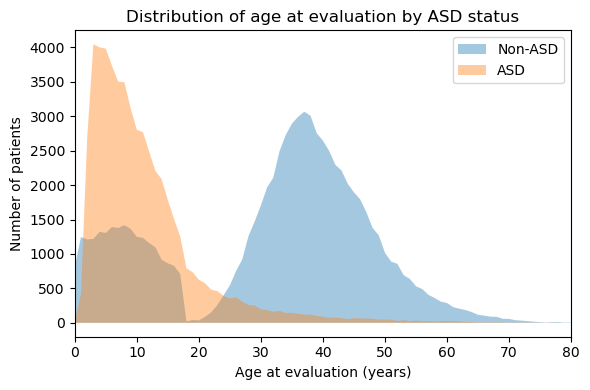

In [76]:
import matplotlib.pyplot as plt

# Sample DataFrame creation
# df = pd.DataFrame({'age_at_eval_year': [...], 'asd_status': [...]})

# Prepare the data
grouped = basic_med_scr_df_small.groupby(['asd', 'age_at_eval_years']).size().unstack(fill_value=0)

# Plotting with adjusted figure size and y-axis limit
plt.figure(figsize=(6, 4))  # Adjusted figure size to make it smaller
for asd_status, values in grouped.iterrows():
    plt.fill_between(values.index, values, label='ASD' if asd_status == 1 else 'Non-ASD', alpha=0.4)

plt.xlabel('Age at evaluation (years)')
plt.ylabel('Number of patients')
plt.title('Distribution of age at evaluation by ASD status')
plt.legend()
plt.xlim(0, 80)  # Set the y-axis limit to 90
plt.tight_layout()  # Adjust layout
plt.savefig('./figures/distribution_by_asd_status.pdf', format='pdf', bbox_inches='tight')  # Save the figure as a PDF

In [95]:
basic_med_scr_df_small.columns

Index(['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id',
       'biofather_id', 'sex', 'depend_adult', 'asd', 'age_at_eval_months',
       'age_at_eval_years', 'attn_behav', 'behav_adhd', 'birth_oth_calc',
       'dev_lang', 'dev_lang_dis', 'gen_dx_oth_calc_self_report', 'gen_test',
       'gen_test_oth_calc', 'growth_oth_calc', 'mood_anx', 'mood_or_anx',
       'neuro_oth_calc', 'prev_study_oth_calc', 'psych_oth_calc', 'eval_year'],
      dtype='object')

In [96]:
# Assuming `df` is your Pandas DataFrame
nan_percentage_asd = basic_med_scr_df_small[basic_med_scr_df_small['asd'] == True].isna().mean() * 100
nan_percentage_no_asd = basic_med_scr_df_small[basic_med_scr_df_small['asd'] == False].isna().mean() * 100




print(nan_percentage_asd)

subject_sp_id                   0.000000
respondent_sp_id                0.001848
family_id                       0.000000
biomother_id                   11.915413
biofather_id                   49.615513
sex                             0.000000
depend_adult                    0.000000
asd                             0.000000
age_at_eval_months              0.000000
age_at_eval_years               0.000000
attn_behav                     55.632371
behav_adhd                     63.285149
birth_oth_calc                  0.000000
dev_lang                       33.208252
dev_lang_dis                   47.351104
gen_dx_oth_calc_self_report     0.000000
gen_test                        0.199638
gen_test_oth_calc               0.000000
growth_oth_calc                 0.000000
mood_anx                       77.895671
mood_or_anx                    65.575437
neuro_oth_calc                  0.000000
prev_study_oth_calc             0.000000
psych_oth_calc                  0.000000
eval_year       

In [97]:
print(nan_percentage_no_asd)


subject_sp_id                   0.000000
respondent_sp_id                0.001251
family_id                       0.000000
biomother_id                   74.806754
biofather_id                   83.947467
sex                             0.000000
depend_adult                    0.000000
asd                             0.000000
age_at_eval_months              0.000000
age_at_eval_years               0.000000
attn_behav                     87.400876
behav_adhd                     88.432770
birth_oth_calc                  0.000000
dev_lang                       92.661664
dev_lang_dis                   96.776735
gen_dx_oth_calc_self_report     0.000000
gen_test                        0.275172
gen_test_oth_calc               0.000000
growth_oth_calc                 0.000000
mood_anx                       79.495935
mood_or_anx                    63.656035
neuro_oth_calc                  0.000000
prev_study_oth_calc             0.000000
psych_oth_calc                  0.000000
eval_year       

In [98]:

med_scr_important_cols = ['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id',
       'biofather_id', 'sex', 'asd', 'age_at_eval_months',
       'age_at_eval_years', 'attn_behav', 'behav_adhd', 'birth_oth_calc',
       'dev_lang', 'dev_lang_dis', 'gen_dx_oth_calc_self_report', 'gen_test',
       'gen_test_oth_calc', 'growth_oth_calc', 'mood_anx', 'mood_or_anx',
       'neuro_oth_calc', 'prev_study_oth_calc', 'psych_oth_calc']

basic_med_scr_df_small  = basic_med_scr_df_small[med_scr_important_cols]

# Missing values imputation
cols_with_missing_values = ['attn_behav', 'behav_adhd', 'dev_lang', 'dev_lang_dis', 'gen_test', 'mood_anx', 'mood_or_anx']
basic_med_scr_df_small[cols_with_missing_values] = basic_med_scr_df_small[cols_with_missing_values].fillna(0)



In [99]:
# remove invalid info
individuals_df= individuals_df[(individuals_df['age_validity_flag'] != 1) & (individuals_df['individual_data_validity'] != 1)]


In [100]:

individuals_important_cols = ['subject_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex',
       'asd', 'multiple_birth', 'age_at_registration_months','diagnosis_age', 'diagnosis','cognitive_impairment', 
       'language_level', 'race_asian','race_african_amer', 'race_native_amer', 'race_native_hawaiian',
       'race_white', 'race_other', 'hispanic']

# manually select only relevant colums (e.g. diagnosis source is dropped)
individuals_df_small = individuals_df[individuals_important_cols]

# drop columns that are only relevant for asd
asd_only_columns = ['diagnosis_age', 'diagnosis','cognitive_impairment', 'language_level']
individuals_df_small = individuals_df_small.drop(columns=asd_only_columns)

# drop rows with missing values
individuals_df_small = individuals_df_small.dropna(subset=['age_at_registration_months'])

# Missing values imputation
race_columns = ['race_asian', 'race_african_amer', 'race_native_amer', 'race_native_hawaiian', 'race_white', 'race_other', 'hispanic']
individuals_df_small[race_columns] = individuals_df_small[race_columns].fillna(0)
individuals_df_small['multiple_birth'] = individuals_df_small['multiple_birth'].fillna("No")



# turn multiple_birth variable into numeric variable with 0 is No and 1 if Twin or Triplet
individuals_df_small['multiple_birth'] = individuals_df_small['multiple_birth'].map(lambda x: 0 if x == "No" else 1)



In [101]:
common_fields = basic_med_scr_df_small.columns.intersection(individuals_df_small.columns).tolist()
print(common_fields)

['subject_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex', 'asd']


In [102]:
print("individuals_df_small before merge:", individuals_df_small.shape)
print("basic_med_scr_df_small before merge:", basic_med_scr_df_small.shape)

med_scr_individuals_df = basic_med_scr_df_small.merge(individuals_df_small, on=common_fields, how='inner')
print("med_scr_individuals_df shape:", med_scr_individuals_df.shape)

individuals_df_small before merge: (226530, 15)
basic_med_scr_df_small before merge: (134048, 23)
med_scr_individuals_df shape: (131686, 32)


In [103]:

# Convert variables to numeric
med_scr_individuals_df['asd'] = med_scr_individuals_df['asd'].map(lambda x: 1 if x == True else 0)
med_scr_individuals_df['sex'] = med_scr_individuals_df['sex'].map(lambda x: 1 if x == "Male" else 0)

In [104]:
med_scr_individuals_df.columns
# id_cols = ['respondent_sp_id', 'family_id', 'biomother_id','biofather_id']
# df = med_scr_individuals_df.drop(id_cols, axis=1)

Index(['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id',
       'biofather_id', 'sex', 'asd', 'age_at_eval_months', 'age_at_eval_years',
       'attn_behav', 'behav_adhd', 'birth_oth_calc', 'dev_lang',
       'dev_lang_dis', 'gen_dx_oth_calc_self_report', 'gen_test',
       'gen_test_oth_calc', 'growth_oth_calc', 'mood_anx', 'mood_or_anx',
       'neuro_oth_calc', 'prev_study_oth_calc', 'psych_oth_calc',
       'multiple_birth', 'age_at_registration_months', 'race_asian',
       'race_african_amer', 'race_native_amer', 'race_native_hawaiian',
       'race_white', 'race_other', 'hispanic'],
      dtype='object')

In [105]:
# med_scr_individuals_df.to_csv('spark_cleaned_data.csv', index=False)